In [134]:
import pandas as pd
import numpy as np
import seaborn as sns;
import matplotlib.pyplot as plt
import logging


%matplotlib inline

In [84]:
df_conf = pd.read_csv('corona_data/time_series_covid_19_confirmed.csv').rename(columns={"Country/Region":"country"})
df_death = pd.read_csv('corona_data/time_series_covid_19_deaths.csv').rename(columns={"Country/Region":"country"})
df_recovered = pd.read_csv('corona_data/time_series_covid_19_recovered.csv').rename(columns={"Country/Region":"country"})

In [85]:
df_conf = df_conf.groupby('country').sum().drop(['Lat', 'Long'], axis=1).reset_index()
df_conf

,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,1,1,1,4,4,5,7,7,7,11
1,Albania,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,10,12,23,33,38
2,Algeria,0,0,0,0,0,0,0,0,0,...,12,17,17,19,20,20,20,24,26,37
3,Andorra,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,Antigua and Barbuda,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,United Kingdom,0,0,0,0,0,0,0,0,0,...,116,164,207,274,322,384,459,459,801,1143
139,Uruguay,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
140,Venezuela,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
141,Vietnam,0,2,2,2,2,2,2,2,2,...,16,16,18,30,30,31,38,39,47,53


In [86]:
df_death = df_death.groupby('country').sum().drop(['Lat', 'Long'], axis=1).reset_index()
df_death

,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Albania,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,1
2,Algeria,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,2,3
3,Andorra,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Antigua and Barbuda,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,United Kingdom,0,0,0,0,0,0,0,0,0,...,1,2,2,3,4,6,8,8,8,21
139,Uruguay,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
140,Venezuela,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
141,Vietnam,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [87]:
df_recovered = df_recovered.groupby('country').sum().drop(['Lat', 'Long'], axis=1).reset_index()
df_recovered

,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Albania,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Algeria,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,8,8,12
3,Andorra,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,Antigua and Barbuda,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,United Kingdom,0,0,0,0,0,0,0,0,0,...,8,8,18,18,18,19,19,19,19,19
139,Uruguay,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
140,Venezuela,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
141,Vietnam,0,0,0,0,0,0,0,0,0,...,16,16,16,16,16,16,16,16,16,16


In [147]:
# Checking all countries
countries = df_conf['country'].tolist()
countries

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahrain',
 'Bangladesh',
 'Belarus',
 'Belgium',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cayman Islands',
 'Chile',
 'China',
 'Colombia',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cruise Ship',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Finland',
 'France',
 'French Guiana',
 'Gabon',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Guadeloupe',
 'Guatemala',
 'Guernsey',
 'Guinea',
 'Guyana',
 'Holy See',
 'Honduras',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Ireland',
 'Israel',
 'Italy',
 'Jamaica',
 'Japan',
 'Jersey',
 'Jordan',
 'Kazakhstan',
 'Kenya',
 'Korea, South',
 'Kuwait',
 '

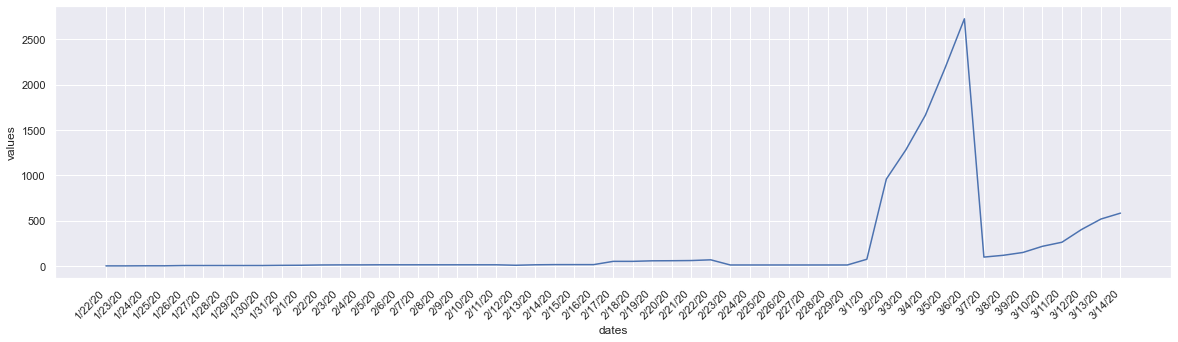

In [136]:
# Selecting USA for confirmed
usa = df_conf[df_conf['country']=='US'].reset_index().drop(['index', 'country'],axis=1)
usa_df = pd.DataFrame()
usa_df['dates'] = dates
usa_df['values'] = usa.values[0]

plt.figure(figsize=(20,5))
chart = sns.lineplot(x='dates', y='values', data=usa_df)
var = chart.set_xticklabels(dates,rotation=45, horizontalalignment='right')

In [152]:
len(df_conf[df_conf['country']=='India'].reset_index().drop(['index', 'country'],axis=1).values[0])

53

## Make confirmed data with country hue

In [171]:
# TODO: Make the data structure more DRY
rows_per_country = len(dates)
country_hue_df_conf = pd.DataFrame()
for country in countries:
    country_df = pd.DataFrame()
    country_df['dates'] = dates
    country_df['values'] = df_conf[df_conf['country']==country].reset_index().drop(['index', 'country'],axis=1).values[0]
    country_df['country'] = [country]*rows_per_country
    if len(country_hue_df_conf) == 0:
        country_hue_df_conf = country_df
    else:
        country_hue_df_conf = country_hue_df_conf.append(country_df)
country_hue_df_conf

,dates,values,country
0,1/22/20,0,Afghanistan
1,1/23/20,0,Afghanistan
2,1/24/20,0,Afghanistan
3,1/25/20,0,Afghanistan
4,1/26/20,0,Afghanistan
...,...,...,...
48,3/10/20,0,occupied Palestinian territory
49,3/11/20,0,occupied Palestinian territory
50,3/12/20,0,occupied Palestinian territory
51,3/13/20,0,occupied Palestinian territory


## Make death data with country hue

In [172]:
# TODO: Make the data structure more DRY
rows_per_country = len(dates)
country_hue_df_death = pd.DataFrame()
for country in countries:
    country_df = pd.DataFrame()
    country_df['dates'] = dates
    country_df['values'] = df_death[df_death['country']==country].reset_index().drop(['index', 'country'],axis=1).values[0]
    country_df['country'] = [country]*rows_per_country
    if len(country_hue_df_death) == 0:
        country_hue_df_death = country_df
    else:
        country_hue_df_death = country_hue_df_death.append(country_df)
country_hue_df_death

,dates,values,country
0,1/22/20,0,Afghanistan
1,1/23/20,0,Afghanistan
2,1/24/20,0,Afghanistan
3,1/25/20,0,Afghanistan
4,1/26/20,0,Afghanistan
...,...,...,...
48,3/10/20,0,occupied Palestinian territory
49,3/11/20,0,occupied Palestinian territory
50,3/12/20,0,occupied Palestinian territory
51,3/13/20,0,occupied Palestinian territory


## Make recoverd data with country hue

In [176]:
# TODO: Make the data structure more DRY
rows_per_country = len(dates)
country_hue_df_recovered = pd.DataFrame()
for country in countries:
    country_df = pd.DataFrame()
    country_df['dates'] = dates
    country_df['values'] = df_recovered[df_death['country']==country].reset_index().drop(['index', 'country'],axis=1).values[0]
    country_df['country'] = [country]*rows_per_country
    if len(country_hue_df_recovered) == 0:
        country_hue_df_recovered = country_df
    else:
        country_hue_df_recovered = country_hue_df_recovered.append(country_df)
country_hue_df_recovered

,dates,values,country
0,1/22/20,0,Afghanistan
1,1/23/20,0,Afghanistan
2,1/24/20,0,Afghanistan
3,1/25/20,0,Afghanistan
4,1/26/20,0,Afghanistan
...,...,...,...
48,3/10/20,0,occupied Palestinian territory
49,3/11/20,0,occupied Palestinian territory
50,3/12/20,0,occupied Palestinian territory
51,3/13/20,0,occupied Palestinian territory


# Confirmed

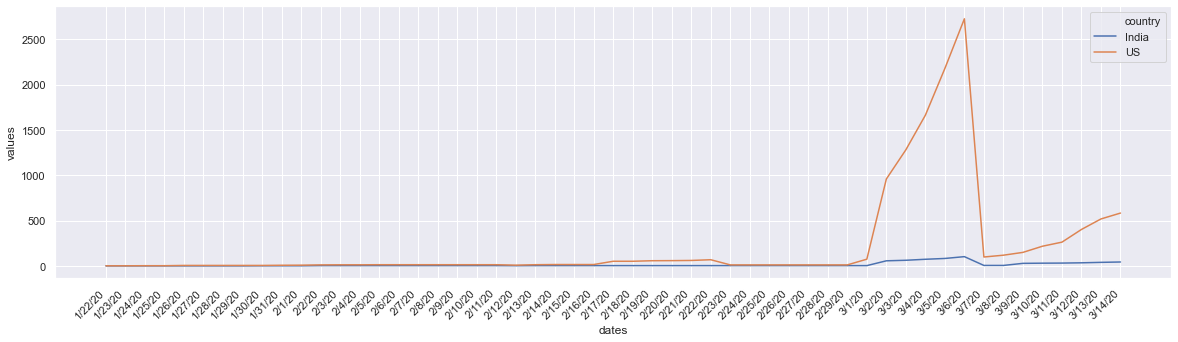

In [175]:
plt.figure(figsize=(20,5))
chart = sns.lineplot(x='dates', y='values', data=country_hue_df_conf[country_hue_df_conf['country'].isin(['India','US'])],hue='country')
var = chart.set_xticklabels(dates,rotation=45, horizontalalignment='right')

# Deaths

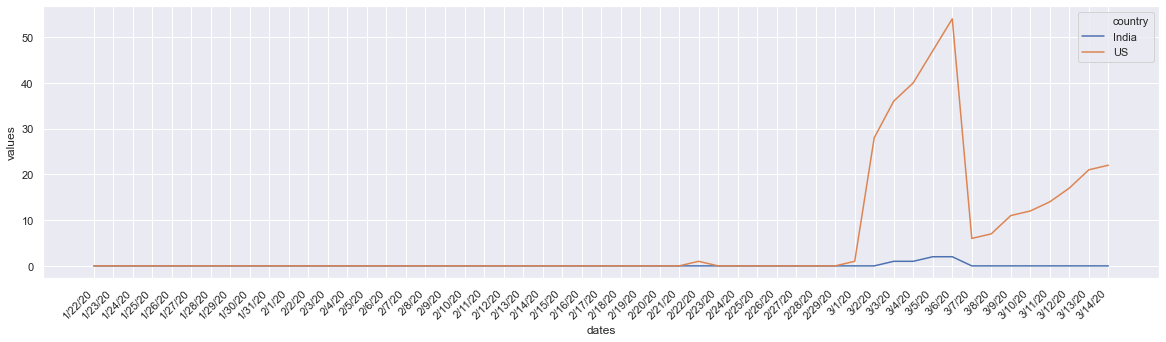

In [177]:
plt.figure(figsize=(20,5))
chart = sns.lineplot(x='dates', y='values', data=country_hue_df_death[country_hue_df_death['country'].isin(['India','US'])],hue='country')
var = chart.set_xticklabels(dates,rotation=45, horizontalalignment='right')

# Recovered

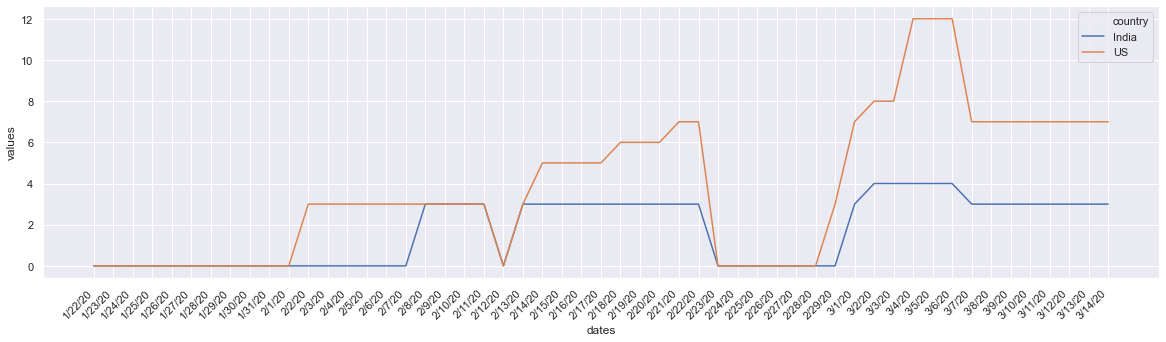

In [178]:
plt.figure(figsize=(20,5))
chart = sns.lineplot(x='dates', y='values', data=country_hue_df_recovered[country_hue_df_recovered['country'].isin(['India','US'])],hue='country')
var = chart.set_xticklabels(dates,rotation=45, horizontalalignment='right')

### Combining all data

In [186]:
master_df = pd.DataFrame(country_hue_df_conf.rename(columns= {'values':'confirmed'}))
master_df

,dates,confirmed,country
0,1/22/20,0,Afghanistan
1,1/23/20,0,Afghanistan
2,1/24/20,0,Afghanistan
3,1/25/20,0,Afghanistan
4,1/26/20,0,Afghanistan
...,...,...,...
48,3/10/20,0,occupied Palestinian territory
49,3/11/20,0,occupied Palestinian territory
50,3/12/20,0,occupied Palestinian territory
51,3/13/20,0,occupied Palestinian territory


In [189]:
master_df['death'] = country_hue_df_death['values']
master_df['recovered'] = country_hue_df_recovered['values']

In [190]:
master_df

,dates,confirmed,country,death,recovered
0,1/22/20,0,Afghanistan,0,0
1,1/23/20,0,Afghanistan,0,0
2,1/24/20,0,Afghanistan,0,0
3,1/25/20,0,Afghanistan,0,0
4,1/26/20,0,Afghanistan,0,0
...,...,...,...,...,...
48,3/10/20,0,occupied Palestinian territory,0,0
49,3/11/20,0,occupied Palestinian territory,0,0
50,3/12/20,0,occupied Palestinian territory,0,0
51,3/13/20,0,occupied Palestinian territory,0,0


# Cases in India

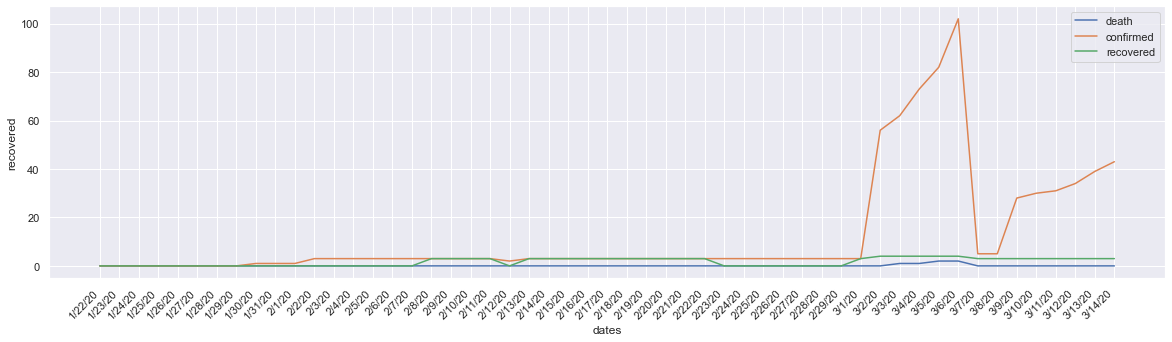

In [202]:
plt.figure(figsize=(20,5))
chart = sns.lineplot(x='dates', y='death', data=master_df[master_df['country'].isin(['India'])], legend='brief', label='death')
var = chart.set_xticklabels(dates,rotation=45, horizontalalignment='right')
chart = sns.lineplot(x='dates', y='confirmed', data=master_df[master_df['country'].isin(['India'])], legend='brief', label='confirmed')
var = chart.set_xticklabels(dates,rotation=45, horizontalalignment='right')
chart = sns.lineplot(x='dates', y='recovered', data=master_df[master_df['country'].isin(['India'])], legend='brief', label='recovered')
var = chart.set_xticklabels(dates,rotation=45, horizontalalignment='right')

# Cases in US

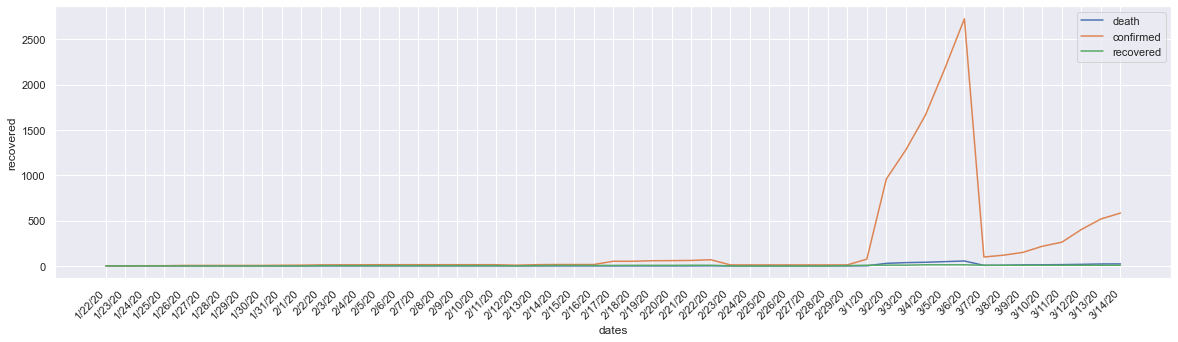

In [204]:
plt.figure(figsize=(20,5))
chart = sns.lineplot(x='dates', y='death', data=master_df[master_df['country'].isin(['US'])], legend='brief', label='death')
var = chart.set_xticklabels(dates,rotation=45, horizontalalignment='right')
chart = sns.lineplot(x='dates', y='confirmed', data=master_df[master_df['country'].isin(['US'])], legend='brief', label='confirmed')
var = chart.set_xticklabels(dates,rotation=45, horizontalalignment='right')
chart = sns.lineplot(x='dates', y='recovered', data=master_df[master_df['country'].isin(['US'])], legend='brief', label='recovered')
var = chart.set_xticklabels(dates,rotation=45, horizontalalignment='right')

# Master DB Cumululative Sum